In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


from sklearn.datasets import fetch_openml


In [3]:
import warnings 
warnings.filterwarnings('ignore')


In [4]:
mnist = fetch_openml('mnist_784', as_frame=False)
X, y= mnist.data, mnist.target

In [5]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train.shape

(56000, 784)

In [8]:
X_test.shape

(14000, 784)

In [9]:
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
score = kn_clf.score(X_test, y_test)
score

0.9721428571428572

Fine-Tuning:

In [11]:
params = {'n_neighbors': np.arange(2, 11, 1), 
          'weights': ['uniform', 'distance']}

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(estimator= knn_clf, 
                           param_grid= params,
                           cv= 5 )
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']})

In [12]:
best_params = grid_search.best_params_
best_params

{'n_neighbors': 4, 'weights': 'distance'}

In [13]:
best_score = grid_search.best_score_

In [14]:
best_estimator = grid_search.best_estimator_
best_estimator.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [15]:
finetuned_score = grid_search.score(X_test, y_test)
finetuned_score

0.9752142857142857

In [28]:
err = (1 - finetuned_score) / (1 - score) - 1
print(f'Error Rate: {err:.0%}')

Error Rate: -11%


Data Augmentation

In [16]:
from scipy.ndimage import shift

In [17]:
def shift_img(image, x, y):
    img = image.reshape((28, 28))
    shifted_img = shift(img, [x, y], cval=0.0, mode='constant')
    return shifted_img.reshape([-1])

In [18]:
img = X_train[100].reshape((28, 28))
shift_ = shift_img(img, 0, -5).reshape((28, 28))

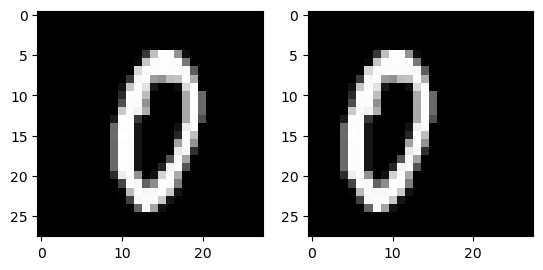

In [19]:
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(shift_, cmap='gray')
plt.show()

In [20]:
shift_pixels = [(0, -1), (0, 1), (-1, 0), (1, 0)]
X_train_augment = [image for image in X_train]
y_train_augment = [label for label in y_train]

for x, y in shift_pixels:
    for image, label in zip(X_train, y_train):
        X_train_augment.append(shift_img(image, x, y))
        y_train_augment.append(label)

X_train_augment = np.array(X_train_augment)
y_train_augment = np.array(y_train_augment)


In [21]:
shuffle_idx = np.random.permutation(len(X_train_augment))
X_train_augment = X_train_augment[shuffle_idx]
y_train_augment = y_train_augment[shuffle_idx]

In [22]:
knn_clf = KNeighborsClassifier(**best_params)

In [23]:
knn_clf.fit(X_train_augment, y_train_augment)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [24]:
augmented_score = knn_clf.score(X_test, y_test)
augmented_score

0.9816428571428572

*Error Rate*

In [ ]:
err = (1 - augmented_score) / (1 - finetuned_score) - 1
print(f'Error Rate: {err:.0%}')

Error Rate: -26%


Error Rate dropped significantly and Accuracy boosted more than 98% thanks to Fine-Tuning and Data Augmentation. 

In [29]:
err = (1 - augmented_score) / (1 - score) - 1
print(f'Error Rate: {err:.0%}')

Error Rate: -34%
